In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

if os.path.exists("MSFT.csv"):
    data = pd.read_csv("MSFT.csv", index_col=0)
else: #download data if not found
    data = yf.Ticker("MSFT")
    data = data.history(period="max")
    data.to_csv("MSFT.csv")



# Convert the index to datetime with utc=True
data.index = pd.to_datetime(data.index, utc=True)

# Ensure the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    data = data.set_index(pd.to_datetime(data.index, utc=True))

# Filter data to include only records from 2016 onwards
data = data[data.index.year >= 2010]

# reset the index (the index will be 0,1,2... rather than the date)
# data = data.reset_index()

#volume values are too lage
data['Volume'] = data['Volume']/10000000

data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-01-02 05:00:00+00:00,10.026811,10.171847,10.017142,10.142839,3.97480,0.0,0.0
1998-01-05 05:00:00+00:00,10.152507,10.336219,9.891443,10.084824,8.03776,0.0,0.0
1998-01-06 05:00:00+00:00,10.036480,10.287875,9.997804,10.142839,6.78344,0.0,0.0
1998-01-07 05:00:00+00:00,10.046144,10.147669,9.862432,10.021972,6.14928,0.0,0.0
1998-01-08 05:00:00+00:00,9.949454,10.220188,9.862433,10.094490,7.76192,0.0,0.0
1998-01-09 05:00:00+00:00,10.060650,10.171844,9.736737,9.823758,8.75344,0.0,0.0
1998-01-12 05:00:00+00:00,9.640047,10.055817,9.620709,10.017140,7.83936,0.0,0.0
1998-01-13 05:00:00+00:00,10.017140,10.229859,9.910780,10.220190,6.69456,0.0,0.0
1998-01-14 05:00:00+00:00,10.220192,10.249199,9.997804,10.142839,5.47744,0.0,0.0


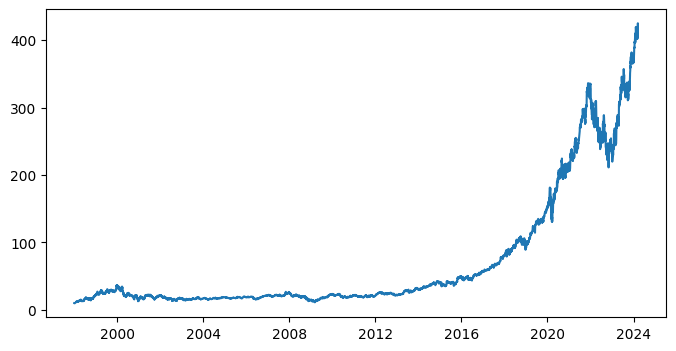

In [7]:
# # Plotting
plt.figure(figsize=(8,4))
plt.plot(data['Close'], label='Closing Price')

In [3]:
# Feature: Moving Averages

data['sma_20'] = data['Close'].rolling(window=20).mean() # 20-day Simple Moving Average
data['ema_12'] = data['Close'].ewm(span=12, adjust=False).mean() # 12-day Exponential Moving Average

# Feature: Rate of Change
data['roc'] = data['Close'].pct_change() * 100 # Percentage change in closing price

# Feature: Bollinger Bands
data['upper_band'], data['lower_band'] = data['Close'].rolling(window=20).mean() + 2 * data['Close'].rolling(window=20).std(), data['Close'].rolling(window=20).mean() - 2 * data['Close'].rolling(window=20).std()

# Feature: Historical Volatility
data['historical_volatility'] = data['Close'].pct_change().rolling(window=20).std() * (252 ** 0.5) # Annualized volatility

# Feature: Price Rate of Change
data['price_roc'] = data['Close'].pct_change()

# Feature Interaction: Volume-Price Interaction
data['volume_price_interaction'] = data['Volume'] * data['Close']

# Feature: Seasonality
data['month'] = data.index.month
data['quarter'] = data.index.quarter

# External Factor: Market Index Movement (Assuming 'market_index' is a separate dataset)
# data['market_index_movement'] = market_index['Close'].pct_change()

# Display the updated DataFrame
data = data.dropna()
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock_Splits,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction,month,quarter
Date,,,,,,,,,,,,,,,,,
2010-02-02 05:00:00+00:00,21.478329,21.576749,21.304200,21.546465,5.44137,0.0,0.0,22.663533,22.175237,0.175973,24.066402,21.260664,0.236034,0.001760,117.242288,2,1
2010-02-03 05:00:00+00:00,21.395047,21.796299,21.289056,21.675165,6.13979,0.0,0.0,22.575333,22.098303,0.597315,23.994590,21.156076,0.238273,0.005973,133.080962,2,1
2010-02-04 05:00:00+00:00,21.485896,21.576746,21.054361,21.077074,7.78500,0.0,0.0,22.464421,21.941191,-2.759338,23.989527,20.939315,0.252798,-0.027593,164.085021,2,1
2010-02-05 05:00:00+00:00,21.198208,21.410191,20.872664,21.213350,8.09601,0.0,0.0,22.372436,21.829215,0.646561,23.968334,20.776538,0.254983,0.006466,171.743496,2,1
2010-02-08 05:00:00+00:00,21.205779,21.258774,20.872664,20.986225,5.28206,0.0,0.0,22.261146,21.699525,-1.070671,23.919723,20.602569,0.252628,-0.010707,110.850500,2,1


In [9]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()
data['Close Tomorrow'] = (data['Close'].shift(-1) > data['Close']).astype(int)* 2 - 1  # * 2 - 1 ==>   replaces 0 with -1

data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close Tomorrow
Date,,,,,,,,
1998-01-02 05:00:00+00:00,10.026811,10.171847,10.017142,10.142839,3.97480,0.0,0.0,-1
1998-01-05 05:00:00+00:00,10.152507,10.336219,9.891443,10.084824,8.03776,0.0,0.0,1
1998-01-06 05:00:00+00:00,10.036480,10.287875,9.997804,10.142839,6.78344,0.0,0.0,-1
1998-01-07 05:00:00+00:00,10.046144,10.147669,9.862432,10.021972,6.14928,0.0,0.0,1
1998-01-08 05:00:00+00:00,9.949454,10.220188,9.862433,10.094490,7.76192,0.0,0.0,-1


In [5]:
horizons = [2,5,60,250] #2days , week, ...

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Close Tomorrow"]

    # Calculate sum of positive and negative values separately
    positive_sum_column = f"trend_Positive_{horizon}"
    negative_sum_column = f"trend_Negative_{horizon}"

    data[positive_sum_column] = data.shift(1).rolling(horizon).apply(lambda x: (x[x == 1]).sum(), raw=True)["Close Tomorrow"]
    data[negative_sum_column] = data.shift(1).rolling(horizon).apply(lambda x: (x[x == -1]).sum(), raw=True)["Close Tomorrow"]


# data = data.dropna(subset=data.columns[data.columns != "Tomorrow"])
data = data.dropna()


data.head(6)

,Open,High,Low,Close,Volume,Dividends,Stock_Splits,sma_20,ema_12,roc,...,trend_Positive_5,trend_Negative_5,Close_Ratio_60,Trend_60,trend_Positive_60,trend_Negative_60,Close_Ratio_250,Trend_250,trend_Positive_250,trend_Negative_250
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-28 05:00:00+00:00,22.335270,22.358456,21.214644,21.446497,14.12494,0.0,0.0,21.890881,21.911171,-3.879455,...,4.0,-1.0,1.015839,-2.0,29.0,-31.0,1.040871,8.0,129.0,-121.0
2011-01-31 05:00:00+00:00,21.461956,21.562426,21.191460,21.431042,6.50290,0.0,0.0,21.883926,21.837305,-0.072064,...,3.0,-2.0,1.014572,-2.0,29.0,-31.0,1.040171,6.0,128.0,-122.0
2011-02-01 05:00:00+00:00,21.485138,21.686078,21.338298,21.631979,6.28107,0.0,0.0,21.884312,21.805716,0.937599,...,3.0,-2.0,1.023450,-2.0,29.0,-31.0,1.049810,8.0,129.0,-121.0
2011-02-02 05:00:00+00:00,21.585607,21.724720,21.546964,21.593336,4.58240,0.0,0.0,21.878516,21.773042,-0.178638,...,2.0,-3.0,1.020842,-2.0,29.0,-31.0,1.047857,6.0,128.0,-122.0
2011-02-03 05:00:00+00:00,21.616520,21.616520,21.284197,21.369209,6.03401,0.0,0.0,21.864991,21.710914,-1.037944,...,1.0,-4.0,1.009629,-2.0,29.0,-31.0,1.036904,6.0,128.0,-122.0
2011-02-04 05:00:00+00:00,21.407853,21.516051,21.261012,21.461952,4.04122,0.0,0.0,21.824417,21.672612,0.434003,...,2.0,-3.0,1.013404,-2.0,29.0,-31.0,1.041353,6.0,128.0,-122.0


In [6]:
#'trend_Positive_2','trend_Positive_5', 'trend_Positive_60', 'trend_Negative_2', 'trend_Negative_5', 'trend_Negative_60'
X = data[['Volume', 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60','trend_Positive_2','trend_Positive_5', 'trend_Positive_60', "sma_20", "ema_12", "roc", "upper_band", "lower_band", "historical_volatility", "price_roc", "volume_price_interaction"]]
X2 = data[['Close', 'Volume', 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60','trend_Positive_2','trend_Positive_5', 'trend_Positive_60', "sma_20", "ema_12", "roc", "upper_band", "lower_band", "historical_volatility", "price_roc", "volume_price_interaction"]]

#Mohammed says that Ratio_60 is very important
y = data['Close Tomorrow']

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #without random_state=44
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# X_train = X.iloc[0:-250]
# y_train = y.iloc[0:-250]

# X_test = X.iloc[-250:]
# y_test = y.iloc[-250:]

# X2_test = X2.iloc[-250:]

X_train.tail()

,Volume,Open - Close,High - Low,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Trend_2,Trend_5,Trend_60,...,trend_Positive_5,trend_Positive_60,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-07 04:00:00+00:00,3.34145,-1.423575,3.649681,1.002186,0.998907,1.015071,1.169058,2.0,1.0,14.0,...,3.0,37.0,131.720797,130.676751,0.438075,136.226843,127.214751,0.208772,0.004381,431.877977
2013-05-08 04:00:00+00:00,5.15957,0.065804,0.485317,0.995174,0.989502,1.129820,1.150428,-2.0,1.0,8.0,...,3.0,34.0,25.698347,26.706594,-0.960648,28.821684,22.575010,0.311492,-0.009606,140.013278
2015-10-30 04:00:00+00:00,4.66198,0.599139,1.207091,0.993208,0.982383,1.148029,1.167762,-2.0,-1.0,10.0,...,2.0,35.0,43.227870,45.003850,-1.349321,48.508591,37.947149,0.392422,-0.013493,216.224505
2022-03-16 04:00:00+00:00,3.78263,-5.186170,11.167878,1.012450,1.033934,0.965791,1.018447,2.0,-1.0,-4.0,...,2.0,28.0,284.091481,282.300733,2.521352,299.395387,268.787575,0.396750,0.025214,1093.773299
2018-04-12 04:00:00+00:00,2.67589,-1.076507,1.619442,1.009275,1.018680,1.018235,1.185337,0.0,1.0,6.0,...,3.0,33.0,85.672065,85.892372,1.872431,89.508847,81.835282,0.429710,0.018724,234.406551


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV #for selecting best parameter (K) for the model
from sklearn.metrics import accuracy_score, confusion_matrix

#using GridSearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
#cv=5 means that the model evaluation is done using 5-fold cross-validation during the grid search for finding the best parameter (n_neighbors) for the KNeighborsClassifier.

#fit the model
model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.66%
Test_data Accuracy: 0.52%

Confusion Matrix for Training Data:
[[835 451]
 [447 902]]

Confusion Matrix for Test Data:
[[160 125]
 [190 184]]

Correct predictions for class "1" in Training Data: 902
Correct predictions for class "-1" in Training Data: 835

Correct predictions for class "1" in Test Data: 184
Correct predictions for class "-1" in Test Data: 160


In [8]:
from sklearn.svm import SVC
model2 = SVC()
model2 = model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model2.predict(X_train))
accuracy_test = accuracy_score(y_test, model2.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model2.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model2.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.66%
Test_data Accuracy: 0.52%

Confusion Matrix for Training Data:
[[835 451]
 [447 902]]

Confusion Matrix for Test Data:
[[160 125]
 [190 184]]

Correct predictions for class "1" in Training Data: 902
Correct predictions for class "-1" in Training Data: 835

Correct predictions for class "1" in Test Data: 184
Correct predictions for class "-1" in Test Data: 160


In [9]:
#try to take off some features like Volume to increase the accurecy

from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=240, min_samples_split=138, random_state=1)

#fit the model
model3.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model3.predict(X_train))
accuracy_test = accuracy_score(y_test, model3.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model3.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model3.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.76%
Test_data Accuracy: 0.56%

Confusion Matrix for Training Data:
[[ 883  403]
 [ 219 1130]]

Confusion Matrix for Test Data:
[[133 152]
 [138 236]]

Correct predictions for class "1" in Training Data: 1130
Correct predictions for class "-1" in Training Data: 883

Correct predictions for class "1" in Test Data: 236
Correct predictions for class "-1" in Test Data: 133


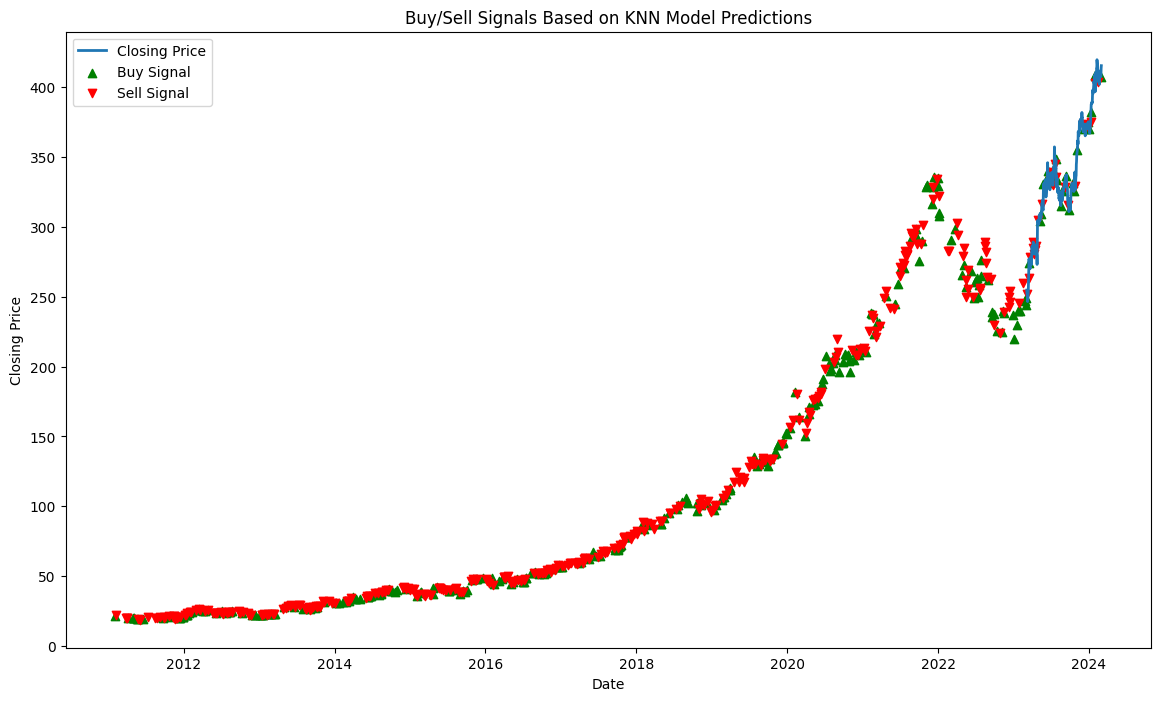

In [10]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame for visualization
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Filter rows where the model predicts a buy signal
buy_signals = df_results[df_results['Predicted'] == 1]

# Filter rows where the model predicts a sell signal
sell_signals = df_results[df_results['Predicted'] == -1]

# Plotting the closing prices
plt.figure(figsize=(14, 8))
plt.plot(data.index[-250:], data['Close'][-250:], label='Closing Price', linewidth=2)

# Plotting buy signals
plt.scatter(buy_signals.index, data['Close'].loc[buy_signals.index], marker='^', color='g', label='Buy Signal')

# Plotting sell signals
plt.scatter(sell_signals.index, data['Close'].loc[sell_signals.index], marker='v', color='r', label='Sell Signal')

plt.title('Buy/Sell Signals Based on KNN Model Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


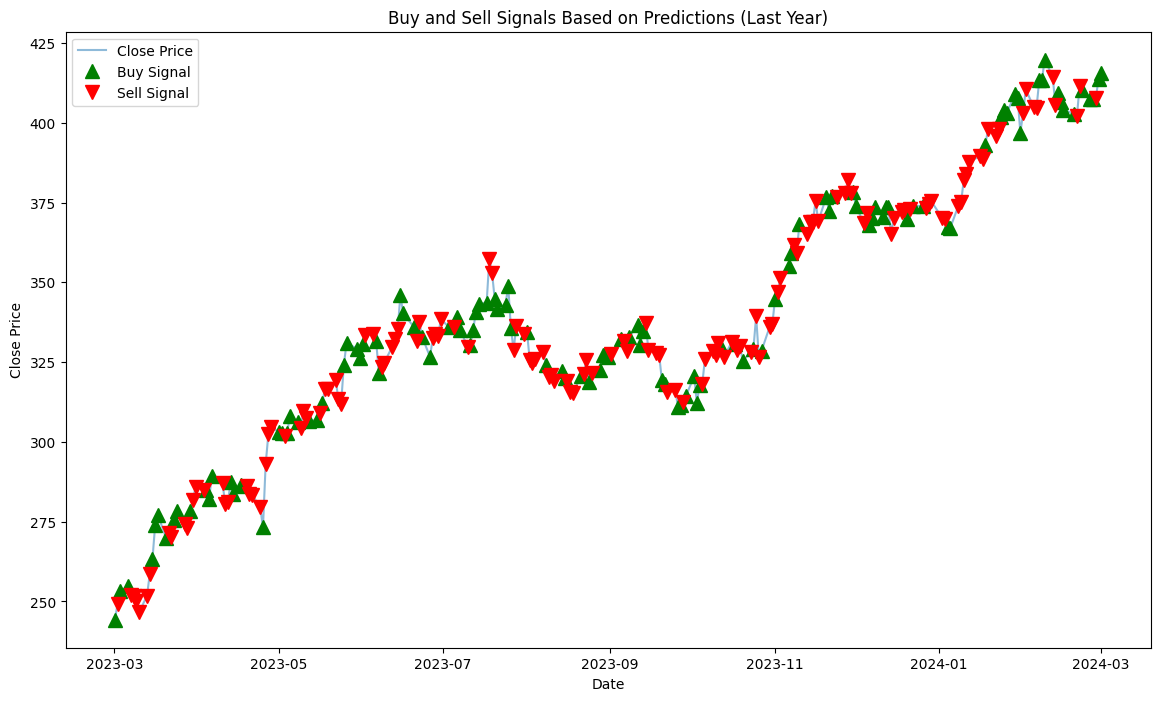

In [11]:
# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last year
last_year_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(years=1)]

# Filter stock data for the last year
last_year_data = data[data.index >= data.index[-1] - pd.DateOffset(years=1)]

# Plot the Buy (1) and Sell (-1) signals for the last year
plt.figure(figsize=(14, 8))
plt.plot(last_year_data.index, last_year_data['Close'], label='Close Price', alpha=0.5)

# Plot Buy signals
plt.plot(last_year_signals[last_year_signals['Buy_Sell_Signal'] == 1].index,
         last_year_data['Close'][last_year_signals['Buy_Sell_Signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(last_year_signals[last_year_signals['Buy_Sell_Signal'] == -1].index,
         last_year_data['Close'][last_year_signals['Buy_Sell_Signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Buy and Sell Signals Based on Predictions (Last Year)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


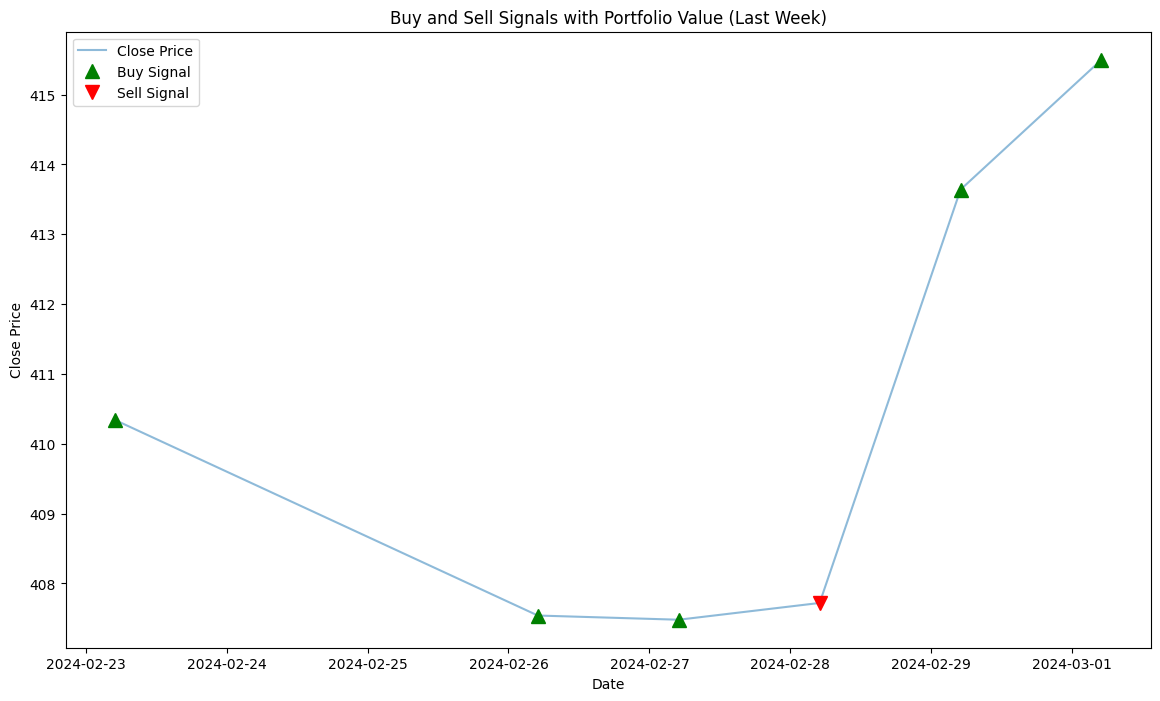

Initial Investment: $410.34
Total Profit after one week of trading: $-2.62
Total Portfolio Value: $407.72


In [12]:
# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last week
last_week_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(weeks=1)]

# Filter stock data for the last week
last_week_data = data[data.index >= data.index[-1] - pd.DateOffset(weeks=1)]

# Calculate profit and portfolio value based on buy and sell signals
profit = 0
portfolio_value = 0
position = 0  # 0: no position, 1: long position, -1: short position
buy_price = 0

for index, row in last_week_signals.iterrows():
    if row['Buy_Sell_Signal'] == 1 and position == 0:  # Buy signal and no current position
        buy_price = last_week_data.loc[index, 'Close']
        position = 1  # Set to long position
    elif row['Buy_Sell_Signal'] == -1 and position == 1:  # Sell signal and long position
        profit += last_week_data.loc[index, 'Close'] - buy_price
        position = 0  # Set to no position

# Calculate the initial investment (assuming one stock bought on the first buy signal)
initial_investment = last_week_data.iloc[0]['Close']

# Calculate the total portfolio value
portfolio_value = initial_investment + profit

# Plot the Buy (1) and Sell (-1) signals for the last week
plt.figure(figsize=(14, 8))
plt.plot(last_week_data.index, last_week_data['Close'], label='Close Price', alpha=0.5)

# Plot Buy signals
plt.plot(last_week_signals[last_week_signals['Buy_Sell_Signal'] == 1].index,
         last_week_data['Close'][last_week_signals['Buy_Sell_Signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(last_week_signals[last_week_signals['Buy_Sell_Signal'] == -1].index,
         last_week_data['Close'][last_week_signals['Buy_Sell_Signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Buy and Sell Signals with Portfolio Value (Last Week)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print the total profit and portfolio value
print(f'Initial Investment: ${initial_investment:.2f}')
print(f'Total Profit after one week of trading: ${profit:.2f}')
print(f'Total Portfolio Value: ${portfolio_value:.2f}')


In [13]:
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()


NameError: name 'X2_test' is not defined

C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with featur

Initial Portfolio Value: 100000
Final Portfolio Value: 150346.71824646
Gain or Loss: 50346.71824645999


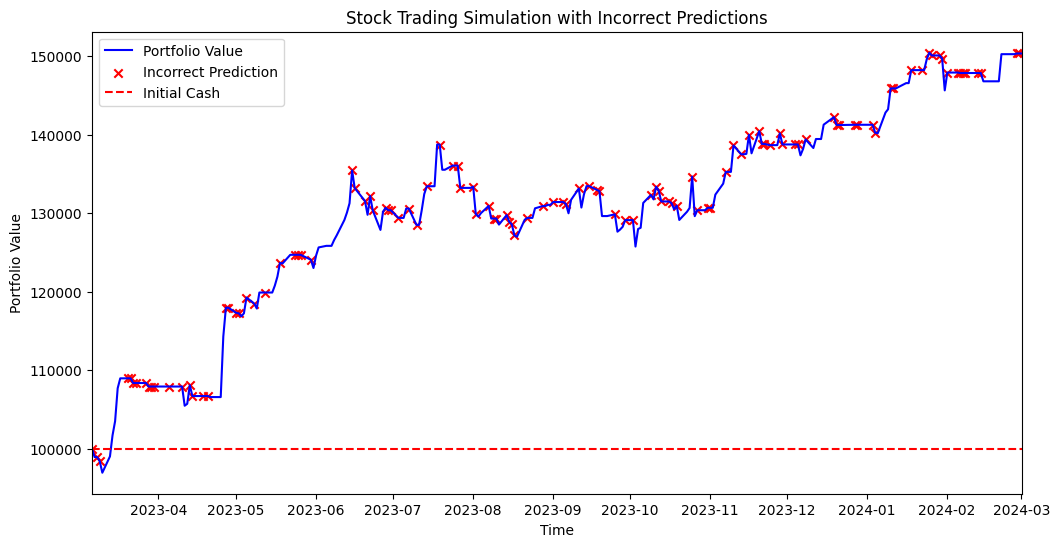

In [ ]:
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []
incorrect_predictions = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

    # Check if the prediction was incorrect
    actual_movement = int(y_test.loc[index])
    if prediction != actual_movement:
        incorrect_predictions.append((index, portfolio_value[-1]))

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X2_test.index, portfolio_value[:-1], label='Portfolio Value', color='blue')  # Exclude the last value for better visualization
incorrect_indices, incorrect_values = zip(*incorrect_predictions)
plt.scatter(incorrect_indices, incorrect_values, color='red', marker='x', label='Incorrect Prediction')

plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation with Incorrect Predictions')
plt.legend()
plt.xlim(X2_test.index[0], X2_test.index[-1])  # Set the x-axis limits to the desired date range
plt.show()

C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted w

Initial Portfolio Value: 100000
Final Portfolio Value: 122699.99368286133
Gain or Loss: 22699.993682861328


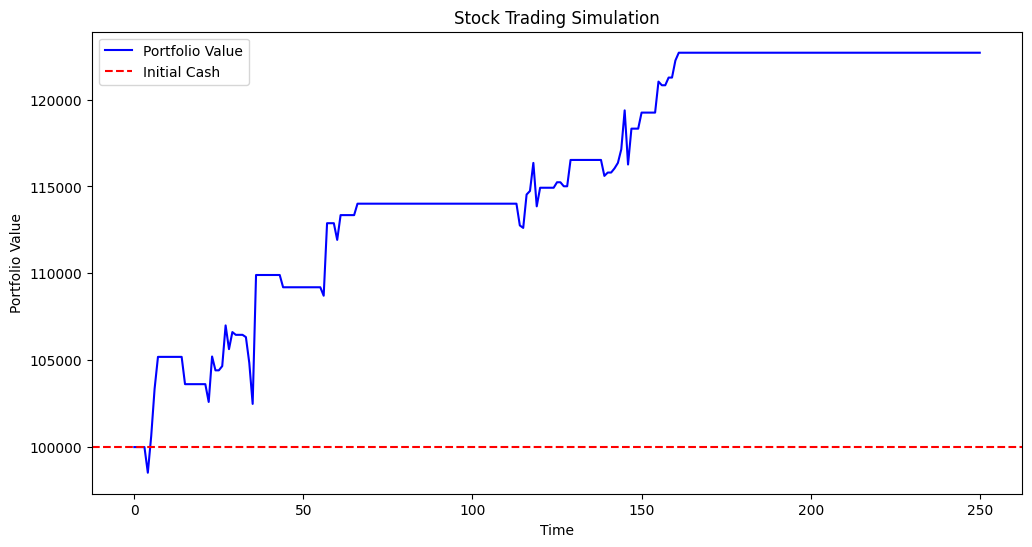

In [ ]:
#random forest model without "Volume" feature
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model3.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()


C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted w

Initial Portfolio Value: 100000
Final Portfolio Value: 122699.99368286133
Gain or Loss: 22699.993682861328


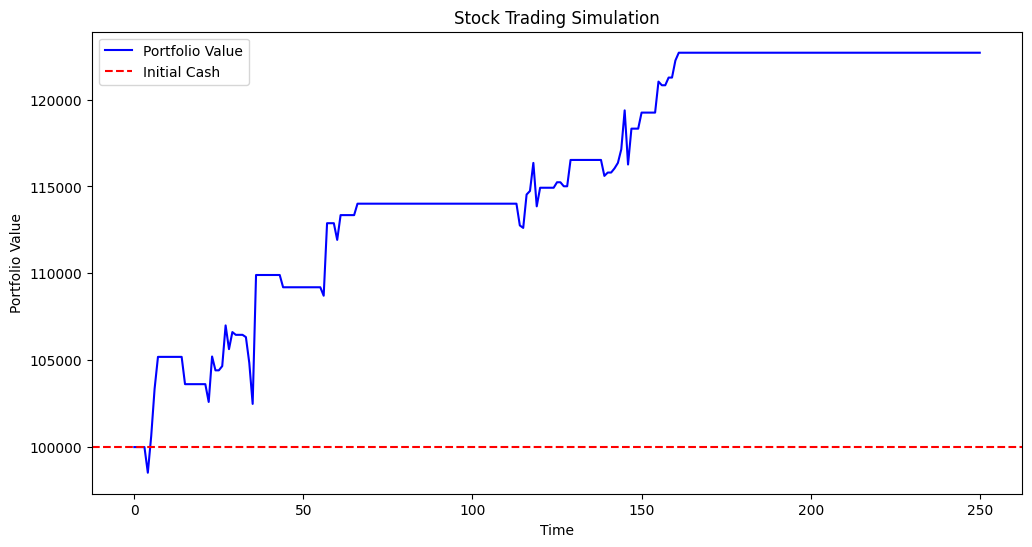

In [ ]:
#random forest model with "Volume" feature
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model3.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()
